# 1. Preparation before running plans... 

## 1.1. Import Numpy and Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## 1.2. Create a RunEngine:

In [2]:
from bluesky import RunEngine
RE = RunEngine({})

## 1.3. Prepare Live Visualization¶

In [3]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

# Make plots update live while scans run.
from bluesky.utils import install_kicker
install_kicker()

## 1.4. Prepare Data Storage

In [4]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

##### This example makes a temporary database. Do not use it for important data. The data will become difficult to access once Python exits or the variable db is deleted. Running Broker.named('temp') a second time creates a fresh, separate temporary database.

## 1.5. Add a Progress Bar

In [5]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

# 2. Simple Customization

In [6]:
from ophyd.sim import det1, det2, det4, motor1, motor2
from bluesky.plans import count, scan
from bluesky.plan_stubs import mv

In [7]:
def coarse_and_ine(detectors, motor, start, stop):
    yield from scan(detectors, motor, start, stop, 10)
    yield from scan(detectors, motor, start, stop, 100)

In [8]:
from bluesky.plan_stubs import mv

def move_then_count(detectors, motors, positions):
    for m in motors:
        for p in positions:
            yield from mv(m, p)
            yield from count(detectors)

In [9]:
def multi_step_scan(detectors, motors, start, stop, steps, step_min=1, step_max=10, note=None, md=None):
    _md = {"detectors" : [det.name for det in detectors], 
           "motors" : [mot.name for mot in motors],
           "start" : start,
           "stop" : stop,
           "steps" : np.arange(step_min, step_max, steps),
           "note" : note if note else "None"}
    _md.update(md or {})
    for m in motors:
        for i in np.arange(step_min, step_max, steps):
            yield from scan(detectors, m, start, stop, i)

In [20]:
def multi_step_scan1(detectors, motors, start, stop, steps, step_min=1, step_max=10):
    for m in motors:
        for i in np.arange(step_min, step_max, steps):
            yield from scan(detectors, m, start, stop, i)

In [13]:
dets = [det1, det2]
mots = [motor1, motor2]
pos = np.arange(0,10,5)



Transient Scan ID: 25     Time: 2022-02-11 14:24:10
Persistent Unique Scan ID: '00f3c1f4-68a2-4861-9a40-5084d9579b3a'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 14:24:10.9 |     -1.000 |      0.000 |      0.677 |
+-----------+------------+------------+------------+------------+
generator scan ['00f3c1f4'] (scan num: 25)





Transient Scan ID: 26     Time: 2022-02-11 14:24:11
Persistent Unique Scan ID: '6abde666-0976-4d37-a92a-540282d60a91'
New stream: 'primary'


<IPython.core.display.Javascript object>


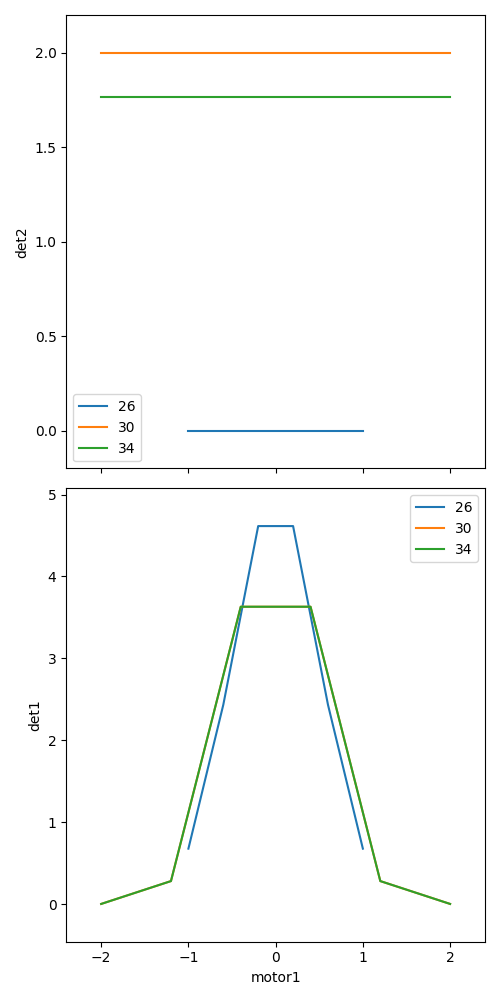

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 14:24:11.2 |     -1.000 |      0.000 |      0.677 |
|         2 | 14:24:11.2 |     -0.600 |      0.000 |      2.434 |
|         3 | 14:24:11.2 |     -0.200 |      0.000 |      4.616 |
|         4 | 14:24:11.2 |      0.200 |      0.000 |      4.616 |
|         5 | 14:24:11.3 |      0.600 |      0.000 |      2.434 |
|         6 | 14:24:11.3 |      1.000 |      0.000 |      0.677 |
+-----------+------------+------------+------------+------------+
generator scan ['6abde666'] (scan num: 26)





Transient Scan ID: 27     Time: 2022-02-11 14:24:11
Persistent Unique Scan ID: '4a1c4c73-f4cf-49c0-9c93-8649e6864df7'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor2 |       det2 |       det1 |
+-----------+-------

<IPython.core.display.Javascript object>


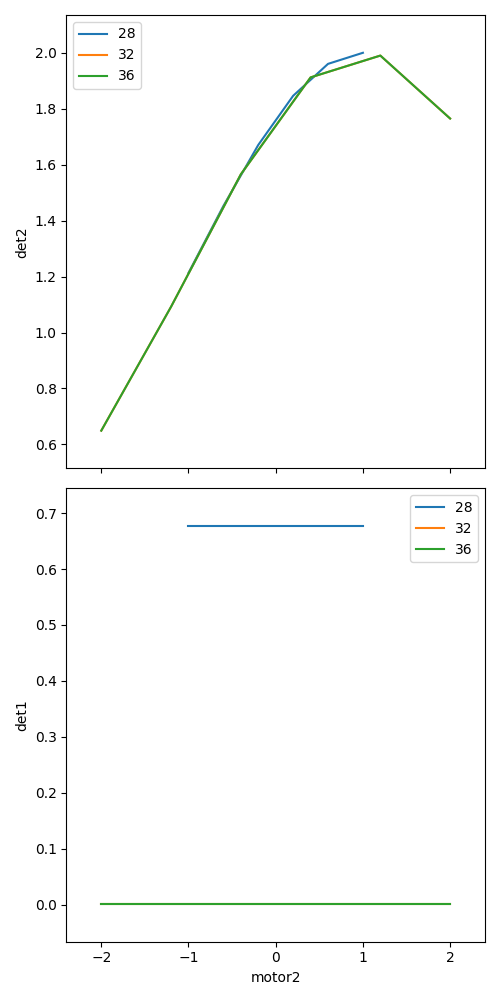

+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor2 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 14:24:11.7 |     -1.000 |      1.213 |      0.677 |
|         2 | 14:24:11.7 |     -0.600 |      1.452 |      0.677 |
|         3 | 14:24:11.7 |     -0.200 |      1.671 |      0.677 |
|         4 | 14:24:11.8 |      0.200 |      1.846 |      0.677 |
|         5 | 14:24:11.8 |      0.600 |      1.960 |      0.677 |
|         6 | 14:24:11.8 |      1.000 |      2.000 |      0.677 |
+-----------+------------+------------+------------+------------+
generator scan ['ac701e20'] (scan num: 28)





('00f3c1f4-68a2-4861-9a40-5084d9579b3a',
 '6abde666-0976-4d37-a92a-540282d60a91',
 '4a1c4c73-f4cf-49c0-9c93-8649e6864df7',
 'ac701e20-9f88-4cd9-a6b6-b6d434b3d753')

In [24]:
RE(multi_step_scan1(dets, mots, -1, 1, 5), note='testtesttest', user='chlin')

In [25]:
header = db[-1]
header.table()

,time,motor2,motor2_setpoint,det2,det1
seq_num,,,,,
1,2022-02-11 19:24:11.778625965,-1.0,-1.0,1.213061,0.676676
2,2022-02-11 19:24:11.788069010,-0.6,-0.6,1.452298,0.676676
3,2022-02-11 19:24:11.795386791,-0.2,-0.2,1.670540,0.676676
4,2022-02-11 19:24:11.803488970,0.2,0.2,1.846233,0.676676
5,2022-02-11 19:24:11.811376095,0.6,0.6,1.960397,0.676676
6,2022-02-11 19:24:11.819633961,1.0,1.0,2.000000,0.676676


In [26]:
list(header.documents())

[('start',
  {'uid': 'ac701e20-9f88-4cd9-a6b6-b6d434b3d753',
   'time': 1644607451.619174,
   'versions': {'ophyd': '1.6.3', 'bluesky': '1.8.2'},
   'scan_id': 28,
   'plan_type': 'generator',
   'plan_name': 'scan',
   'detectors': ['det1', 'det2'],
   'motors': ['motor2'],
   'num_points': 6,
   'num_intervals': 5,
   'plan_args': {'detectors': ["SynGauss(prefix='', name='det1', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])",
     "SynGauss(prefix='', name='det2', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
    'num': 6,
    'args': ["SynAxis(prefix='', name='motor2', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])",
     -1,
     1],
    'per_step': 'None'},
   'hints': {'dimensions': [[['motor2'], 'primary']]},
   'plan_pattern': 'inner_product',
   'plan_pattern_module': 'bluesky.plan_patterns',
   'plan_pattern_args': {'num': 6,
    '

In [27]:
header.start['uid']

'ac701e20-9f88-4cd9-a6b6-b6d434b3d753'

In [28]:
list(header.start.keys())

['uid',
 'time',
 'versions',
 'scan_id',
 'plan_type',
 'plan_name',
 'detectors',
 'motors',
 'num_points',
 'num_intervals',
 'plan_args',
 'hints',
 'plan_pattern',
 'plan_pattern_module',
 'plan_pattern_args',
 'note',
 'user']

In [31]:
header.start['note']

'testtesttest'

In [32]:
header.start['user']

'chlin'

In [33]:
RE(multi_step_scan1(dets, mots, -2, 2, 5), note='testtesttest', user='chlin')



Transient Scan ID: 29     Time: 2022-02-11 14:32:45
Persistent Unique Scan ID: 'd362f778-a72d-4392-877b-a76b85823019'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 14:32:45.5 |     -2.000 |      2.000 |      0.002 |
+-----------+------------+------------+------------+------------+
generator scan ['d362f778'] (scan num: 29)





Transient Scan ID: 30     Time: 2022-02-11 14:32:45
Persistent Unique Scan ID: 'f64d3a24-731f-4b24-b2ee-ca52681e7d7b'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 14:32:45.7 |     -2.000 |      2.000 |      0.002 |
|         2 | 14:32:45.7 |     -1.200 |      2.000 |      0.281 |
|         

('d362f778-a72d-4392-877b-a76b85823019',
 'f64d3a24-731f-4b24-b2ee-ca52681e7d7b',
 'cf762c03-0634-4819-afa4-e539016361d5',
 '57d36296-8c78-4978-9f70-0a36b530cd22')

In [34]:
headers = db(user='chlin')

/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/databroker/v1.py:293: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  tz = tz.zone


In [41]:
headers

In [42]:
for header in headers:
    print(header.start['uid'])

ac701e20-9f88-4cd9-a6b6-b6d434b3d753
4a020097-9e78-4528-9751-1ca578108afa
57d36296-8c78-4978-9f70-0a36b530cd22
4a1c4c73-f4cf-49c0-9c93-8649e6864df7
cf762c03-0634-4819-afa4-e539016361d5
00f3c1f4-68a2-4861-9a40-5084d9579b3a
f64d3a24-731f-4b24-b2ee-ca52681e7d7b
0bd40102-935f-41c3-8172-ded92d142562
4992e449-a6d8-4a6c-8e84-8fb5eda1f05d
6abde666-0976-4d37-a92a-540282d60a91
d362f778-a72d-4392-877b-a76b85823019
5a4cdc5b-a404-42c0-9d58-6e845afb9647


In [45]:
uid_list = [header.start['uid'] for header in headers]
uid_list[:2]

['ac701e20-9f88-4cd9-a6b6-b6d434b3d753',
 '4a020097-9e78-4528-9751-1ca578108afa']

In [47]:
def multi_step_scan2(detectors, motors, start, stop, steps, step_min=1, step_max=10, note=None, user=None, md=None):
    md = md or {}  # handle the default case
    # putting unpacking **md at the end means it "wins"
    # and if the user calls
    #    yield from plan(md={'purpose': bob})
    # it will over-ride these values
    for m in motors:
        for i in np.arange(step_min, step_max, steps):
            yield from scan(detectors, m, start, stop, i, md={'note' : note, 'user' : user, **md})

In [48]:
RE(multi_step_scan2(dets, mots, -2, 2, 5, user='chlin'))



Transient Scan ID: 33     Time: 2022-02-11 16:04:55
Persistent Unique Scan ID: '22088b7e-5c29-4ce2-a49d-f779d61110c5'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:04:55.7 |     -2.000 |      1.765 |      0.002 |
+-----------+------------+------------+------------+------------+
generator scan ['22088b7e'] (scan num: 33)





Transient Scan ID: 34     Time: 2022-02-11 16:04:55
Persistent Unique Scan ID: 'b6e1d98e-56de-4a7f-a624-e5ea75ed7fe4'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |       det2 |       det1 |
+-----------+------------+------------+------------+------------+
|         1 | 16:04:55.9 |     -2.000 |      1.765 |      0.002 |
|         2 | 16:04:55.9 |     -1.200 |      1.765 |      0.281 |
|         

('22088b7e-5c29-4ce2-a49d-f779d61110c5',
 'b6e1d98e-56de-4a7f-a624-e5ea75ed7fe4',
 'd91545b0-bed4-480f-87ba-eb01533be51d',
 'af821af2-09e0-4b94-9f56-6d4f2bb561d8')

In [49]:
header = db[-1]
list(header.start.keys())

['uid',
 'time',
 'versions',
 'scan_id',
 'plan_type',
 'plan_name',
 'detectors',
 'motors',
 'num_points',
 'num_intervals',
 'plan_args',
 'hints',
 'plan_pattern',
 'plan_pattern_module',
 'plan_pattern_args',
 'note',
 'user']

In [51]:
header.start['user']

'chlin'

In [72]:
import bluesky.plan_stubs as bps
import bluesky.preprocessors as bpp

def one_run_one_event1(detectors):
    yield from bps.open_run()
    yield from bps.trigger_and_read(detectors)
    yield from bps.close_run()

In [73]:
RE(one_run_one_event1(dets))



Transient Scan ID: 40     Time: 2022-02-11 16:26:54
Persistent Unique Scan ID: '395ede67-ef51-4dd3-a8cf-46a0fcc5fdf2'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 16:26:54.2 |      1.765 |      0.002 |
+-----------+------------+------------+------------+
generator one_run_one_event1 ['395ede67'] (scan num: 40)





('395ede67-ef51-4dd3-a8cf-46a0fcc5fdf2',)

In [74]:
def one_run_one_event2(detectors):

    @bpp.stage_decorator(detectors)
    @bpp.run_decorator()
    def inner():
        yield from bps.trigger_and_read(detectors)

    return (yield from inner())
    #yield from inner()



Transient Scan ID: 41     Time: 2022-02-11 16:27:03
Persistent Unique Scan ID: 'd81610df-49f9-4010-a530-5482d7bad079'
New stream: 'primary'


<IPython.core.display.Javascript object>


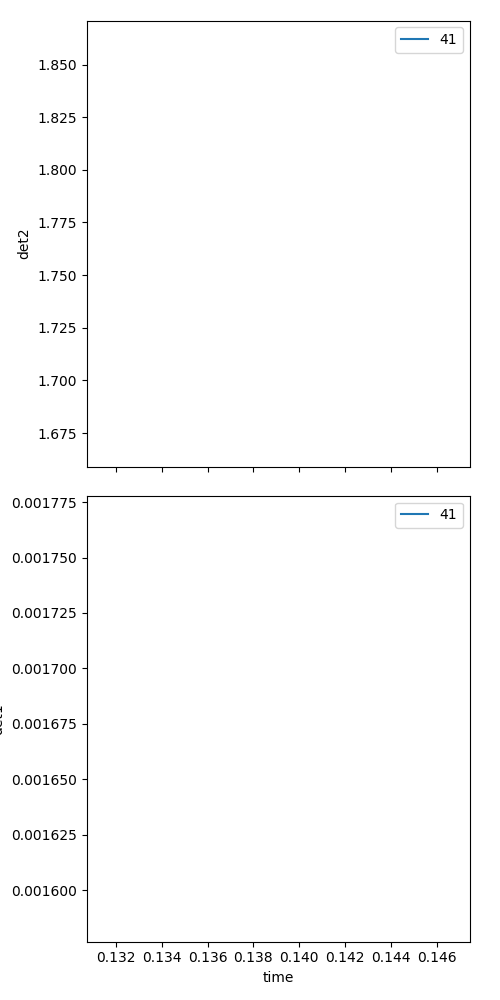

+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 16:27:03.8 |      1.765 |      0.002 |
+-----------+------------+------------+------------+
generator one_run_one_event2 ['d81610df'] (scan num: 41)





('d81610df-49f9-4010-a530-5482d7bad079',)

In [75]:
RE(one_run_one_event2(dets))

In [82]:
def one_run_one_event3(detectors, md=None):

    _md = {
        'detectors': [det.name for det in detectors],
        'plan_args': {'detectors': list(map(repr, detectors))},
        'plan_name': 'one_run_one_event',
    }

    # If a key exists in md, it overwrites the default in _md.
    _md.update(md or {})

    @bpp.stage_decorator(detectors)
    @bpp.run_decorator(_md)
    def inner():
        yield from bps.trigger_and_read(detectors)

    return (yield from inner())

In [81]:
RE(one_run_one_event3(dets))

Run aborted
Traceback (most recent call last):
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/run_engine.py", line 1512, in _run
    msg = self._plan_stack[-1].send(resp)
  File "/var/folders/gn/7h2xsmb5013_qmqytmsw3hcm0000gq/T/ipykernel_1337/4174077970.py", line 17, in one_run_one_event3
    return (yield from inner())
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/utils/__init__.py", line 1140, in dec_inner
    return (yield from plan)
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/preprocessors.py", line 952, in stage_wrapper
    return (yield from finalize_wrapper(inner(), unstage_devices()))
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/preprocessors.py", line 509, in finalize_wrapper
    ret = yield from plan
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/preprocessors.py", line 950, in inner
    return (yi

TypeError: run_wrapper() takes 1 positional argument but 2 were given

In [86]:
def multi_step_scan3(detectors, motors, start, stop, steps, step_min=1, step_max=10, note=None, user=None, md=None):
    _md = {"detectors" : [det.name for det in detectors], 
           "motors" : [mot.name for mot in motors],
           "start" : start,
           "stop" : stop,
           "steps" : list(np.arange(step_min, step_max, steps)),
           "note" : note if note else "None",
           "user" : user}
    _md.update(md or {})
    
    @bpp.stage_decorator(detectors)
    @bpp.run_decorator(_md)
    def inner(): 
        for m in motors:
            for i in np.arange(step_min, step_max, steps):
                yield from scan(detectors, m, start, stop, i)
    return (yield from inner())

In [87]:
RE(multi_step_scan3(dets, mots, -2, 2, 2, user='chlin'))

Run aborted
Traceback (most recent call last):
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/run_engine.py", line 1512, in _run
    msg = self._plan_stack[-1].send(resp)
  File "/var/folders/gn/7h2xsmb5013_qmqytmsw3hcm0000gq/T/ipykernel_1337/633395865.py", line 17, in multi_step_scan3
    return (yield from inner())
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/utils/__init__.py", line 1140, in dec_inner
    return (yield from plan)
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/preprocessors.py", line 952, in stage_wrapper
    return (yield from finalize_wrapper(inner(), unstage_devices()))
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/preprocessors.py", line 509, in finalize_wrapper
    ret = yield from plan
  File "/opt/anaconda3/envs/bluesky-tutorials/lib/python3.7/site-packages/bluesky/preprocessors.py", line 950, in inner
    return (yield

TypeError: run_wrapper() takes 1 positional argument but 2 were given